# Netflix Movies & TV Shows – Exploratory Data Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Loading


In [2]:
df = pd.read_csv("netflix_titles.csv",index_col=0)

In [3]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [6]:
df.release_year.describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [7]:
df.duplicated().sum()

np.int64(0)

## Missing Value Handling


In [8]:
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.country = df.country.fillna('unknown')

In [10]:
df.rating=df.rating.fillna(df.rating.mode()[0])

## Content Distribution Analysis


In [11]:
df.groupby('rating')['type'].value_counts().unstack()


type,Movie,TV Show
rating,,
66 min,1.0,NaN
74 min,1.0,NaN
84 min,1.0,NaN
G,41.0,NaN
NC-17,3.0,NaN
NR,75.0,5.0
PG,287.0,NaN
PG-13,490.0,NaN
R,797.0,2.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       8807 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [13]:
df.country.value_counts()

country
United States                             2818
India                                      972
unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [14]:
df.rating.value_counts()

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

<BarContainer object of 2 artists>

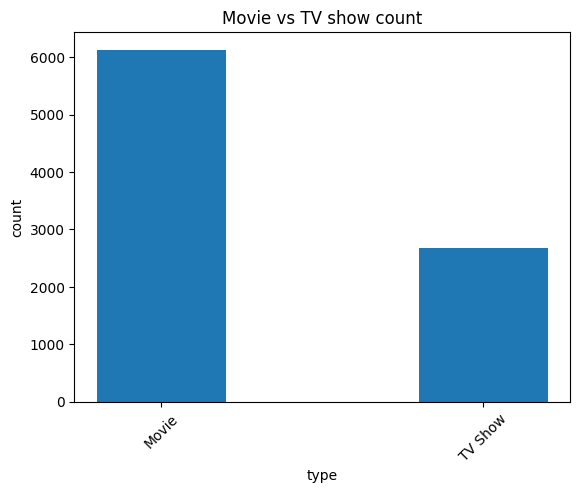

In [15]:
type=df.type.value_counts()
plt.Figure(figsize=(14,8))
plt.xlabel('type')
plt.ylabel('count')
plt.title('Movie vs TV show count')
plt.xticks(rotation=45)
plt.bar(type.index,type.values,width=0.4)

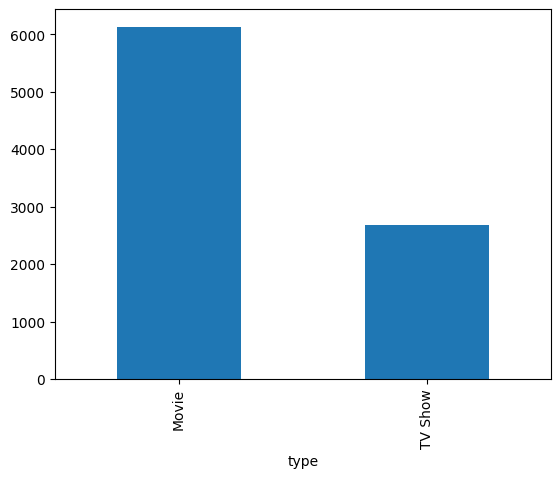

In [16]:
type=df.type.value_counts().plot(kind='bar')

<Axes: xlabel='type', ylabel='count'>

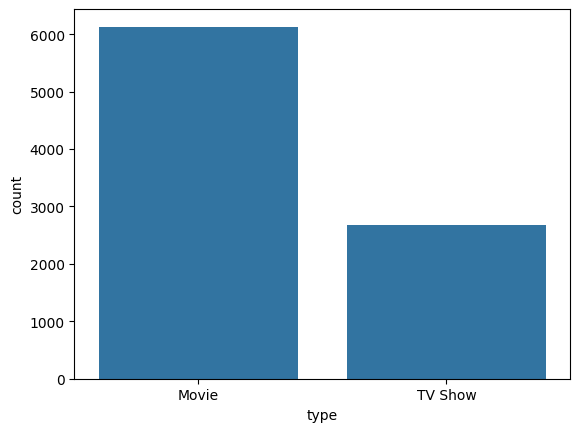

In [17]:
sns.countplot(data=df,x='type')

## Trends Over Time


In [18]:
years= df.date_added.str.split().str[2]
df['year_added']=years

<Axes: xlabel='year_added', ylabel='count'>

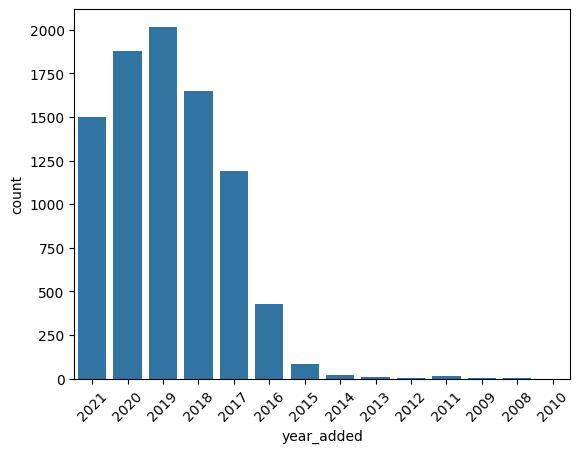

In [19]:
plt.Figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(data=df,x='year_added')

<Axes: xlabel='year_added'>

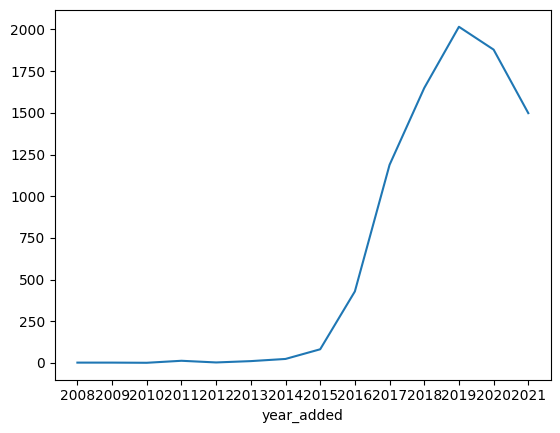

In [20]:
a=df.year_added.value_counts().sort_index()
sns.lineplot(x=a.index,y=a.values)

<Axes: xlabel='year_added'>

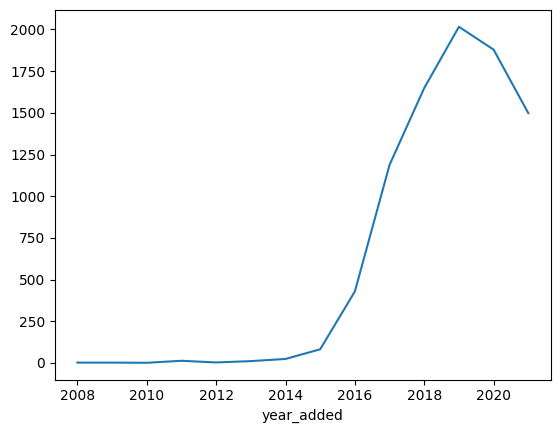

In [21]:
a.plot(kind='line')

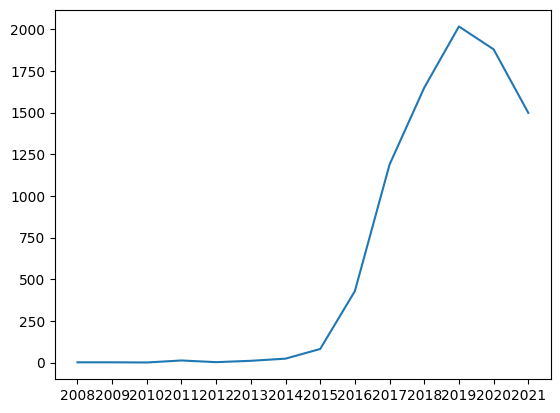

In [22]:
plt.plot(a.index,a.values)

## EDA Summary

- Netflix has more movies than TV shows.
- Most content is targeted at mature audiences (TV-MA, TV-14).
- Content additions increased significantly after 2015.
- The United States is the largest content producer.
- Recent years show a steady rise in new titles.
